In [1]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict

In [2]:
# define state

class BMIstate(TypedDict):
    
    weight_kg:float
    height_m:float
    bmi:float
    category:str

In [3]:
def caluclate_bmi(state:BMIstate) -> BMIstate:
    
    weight = state['weight_kg']
    height = state['height_m']
    
    bmi = weight/(height**2)
    
    state['bmi'] = round(bmi,2)
    
    return state

In [4]:
def label_bmi(state: BMIstate) -> BMIstate:

    bmi = state['bmi']

    if bmi < 18.5:
        state["category"] = "Underweight"
    elif 18.5 <= bmi < 25:
        state["category"] = "Normal"
    elif 25 <= bmi < 30:
        state["category"] = "Overweight"
    else:
        state["category"] = "Obese"

    return state

In [5]:
# define your graph

graph = StateGraph(BMIstate)

# define nodes 
graph.add_node("caluclate_bmi",caluclate_bmi)
graph.add_node("label_bmi",label_bmi)

# define edges
graph.add_edge(START,"caluclate_bmi")
graph.add_edge("caluclate_bmi","label_bmi")
graph.add_edge("label_bmi",END)

# compile the graph
wrokflow = graph.compile()

In [6]:
# excute the graph
intial_state = {'weight_kg':80, 'height_m':1.73}

final_state = wrokflow.invoke(intial_state)

print(final_state)

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73, 'category': 'Overweight'}


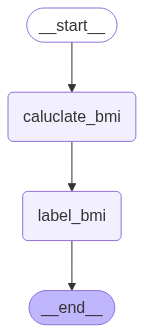

In [7]:
from IPython.display import Image
Image(wrokflow.get_graph().draw_mermaid_png())